In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


# DATA PREPROCESSING AND EDA

In the below lines of code, I will do preprocessing check for ouliers, null values, duplicates also understand the relationship between different columns, create plots and charts to understand the dataset further and much more so stay tuned

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [5]:
df.tail()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500
1641,toyota,2022,petrol,20 km,left,white,sedan,excellent,2.0,28500


In [6]:
df.columns

Index(['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'type',
       'status', 'motor_volume', 'price'],
      dtype='object')

In [7]:
df.describe()

,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [8]:
df.describe(include="all")

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
count,1642,1642.000000,1642,1642,1642,1642,1642,1642,1642.000000,1642.000000
unique,5,NaN,5,643,1,17,7,5,NaN,NaN
top,mercedes-benz,NaN,petrol,300000 km,left,black,sedan,excellent,NaN,NaN
freq,402,NaN,1420,19,1642,541,1276,1200,NaN,NaN
mean,NaN,2014.805725,NaN,NaN,NaN,NaN,NaN,NaN,2.035018,15982.633374
std,NaN,6.587573,NaN,NaN,NaN,NaN,NaN,NaN,0.253069,7176.084647
min,NaN,1987.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,462.000000
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,12000.000000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,15750.000000
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,18500.000000


In [9]:
df.nunique()

model             5
year             32
motor_type        5
running         643
wheel             1
color            17
type              7
status            5
motor_volume     20
price           294
dtype: int64

In [10]:
df.dtypes

model            object
year              int64
motor_type       object
running          object
wheel            object
color            object
type             object
status           object
motor_volume    float64
price             int64
dtype: object

In [11]:
df['price']

0       24500
1       25500
2       11700
3       12000
4       26000
        ...  
1637    12400
1638    16500
1639    19500
1640    19500
1641    28500
Name: price, Length: 1642, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

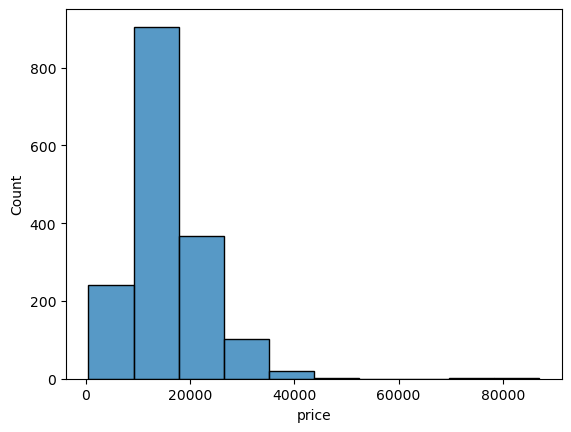

In [12]:
sns.histplot(x='price', data=df, bins=10)

In [13]:
print('The maximum price is:', df['price'].max())
print('The minimum price is:', df['price'].min())

The maximum price is: 87000
The minimum price is: 462


In [14]:
df.price.describe()

count     1642.000000
mean     15982.633374
std       7176.084647
min        462.000000
25%      12000.000000
50%      15750.000000
75%      18500.000000
max      87000.000000
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

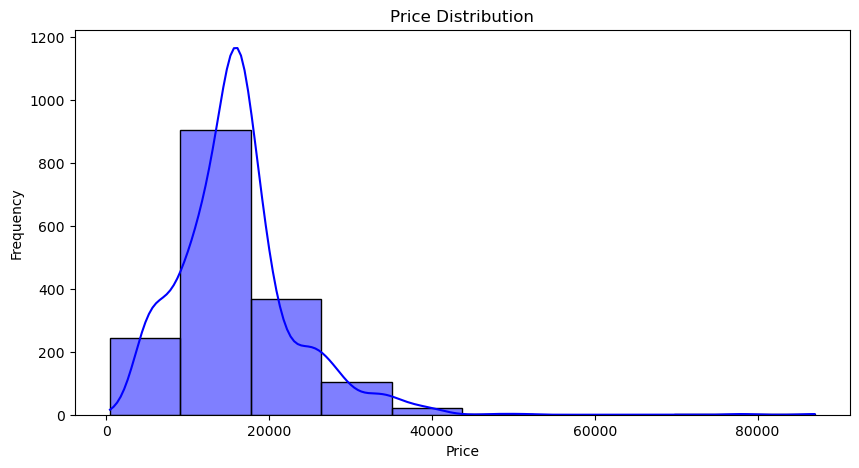

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(x='price', data=df, bins=10, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

In [16]:
df['log_price'] = np.log1p(df['price']) 

In [17]:
df['log_price']

0       10.106469
1       10.146473
2        9.367430
3        9.392745
4       10.165890
          ...    
1637     9.425532
1638     9.711176
1639     9.878221
1640     9.878221
1641    10.257694
Name: log_price, Length: 1642, dtype: float64

Text(0.5, 1.0, 'Log-Transformed Price Distribution')

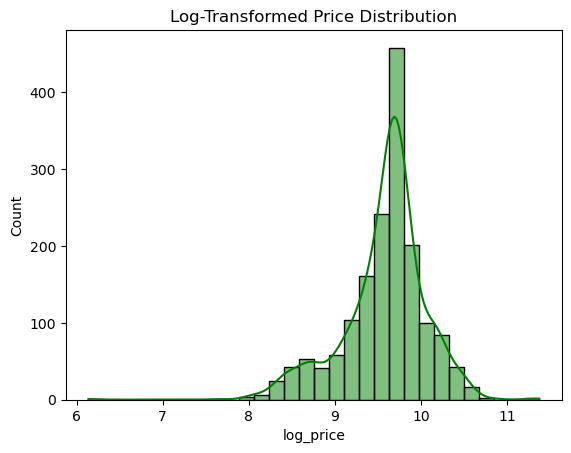

In [18]:
sns.histplot(df["log_price"], bins=30, kde=True, color="green")
plt.title("Log-Transformed Price Distribution")

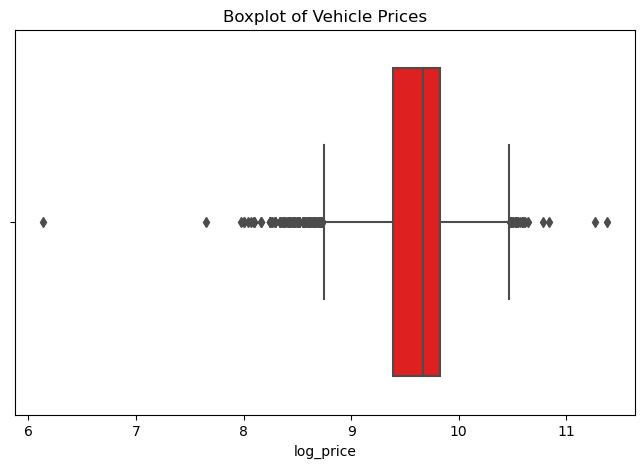

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["log_price"], color="red")
plt.title("Boxplot of Vehicle Prices")
plt.show()

In [20]:
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower bound:',lower_bound, 'Upper bound:',upper_bound)

lower bound: 8.7434930510892 Upper bound: 10.474832271201844


In [21]:
outliers = df[(df["log_price"] < lower_bound) | (df["log_price"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 150


In [22]:
outliers

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price
5,mercedes-benz,2001,petrol,286293 km,left,blue,sedan,good,1.8,6000,8.699681
47,mercedes-benz,1998,petrol,200000 km,left,green,sedan,good,3.2,5500,8.612685
49,mercedes-benz,2001,gas,260000 km,left,white,sedan,good,2.0,6000,8.699681
72,mercedes-benz,2000,gas,317000 km,left,black,sedan,good,2.0,5200,8.556606
78,mercedes-benz,1996,petrol,250000 km,left,black,sedan,normal,2.0,2100,7.650169
...,...,...,...,...,...,...,...,...,...,...,...
1541,mercedes-benz,2016,petrol,130000 km,left,black,sedan,excellent,2.0,40000,10.596660
1551,mercedes-benz,1997,gas,209000 km,left,blue,sedan,good,2.0,5700,8.648397
1595,mercedes-benz,1999,gas,277000 km,left,blue,sedan,excellent,2.0,6000,8.699681
1596,mercedes-benz,1998,petrol,152000 km,left,black,sedan,excellent,2.0,4600,8.434029


In [23]:
df_cleaned = df[(df["log_price"] >= lower_bound) & (df["log_price"] <= upper_bound)]
print(f"Remaining rows after outlier removal: {len(df_cleaned)}")


Remaining rows after outlier removal: 1492


In [24]:
df_cleaned

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500,10.106469
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500,10.146473
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700,9.367430
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000,9.392745
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000,10.165890
...,...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400,9.425532
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500,9.711176
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500,9.878221
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500,9.878221


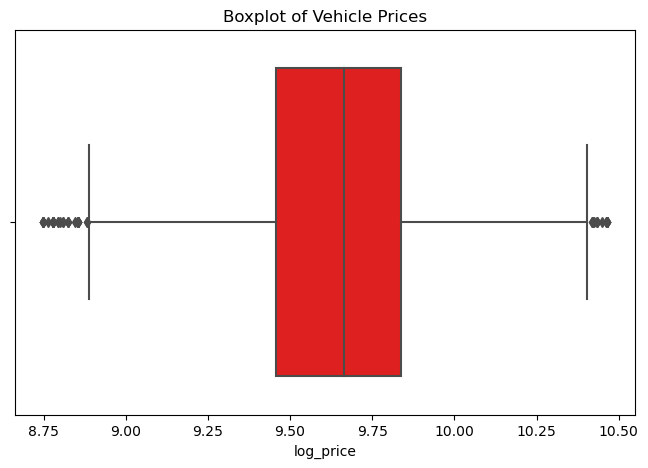

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["log_price"], color="red")
plt.title("Boxplot of Vehicle Prices")
plt.show()

In [26]:
df_cleaned['model']

0              toyota
1       mercedes-benz
2                 kia
3       mercedes-benz
4       mercedes-benz
            ...      
1637          hyundai
1638           toyota
1639           nissan
1640           nissan
1641           toyota
Name: model, Length: 1492, dtype: object

In [27]:
df_cleaned['model'].nunique()

5

Text(0.5, 1.0, 'Price by Car Model')

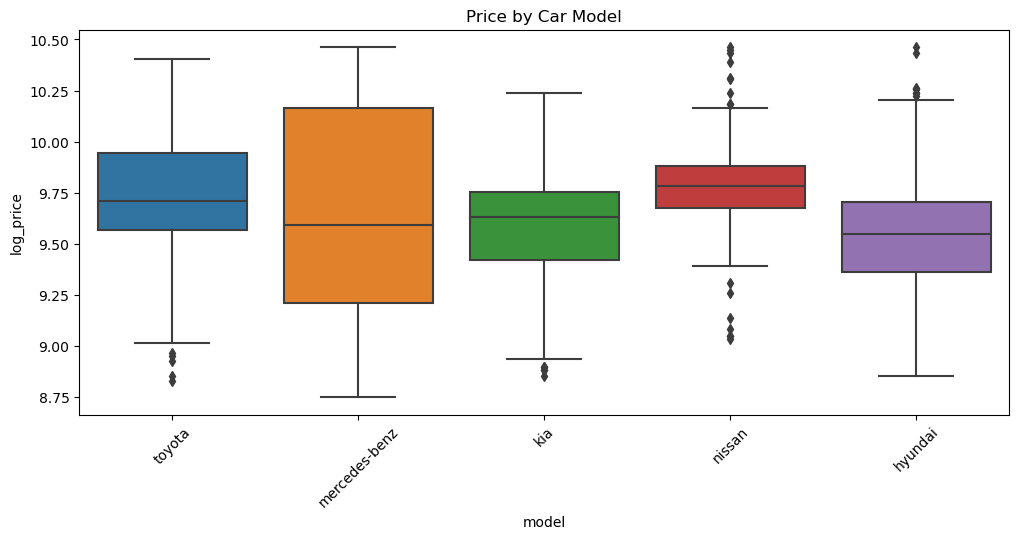

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df_cleaned["model"], y=df_cleaned["log_price"])
plt.xticks(rotation=45)
plt.title("Price by Car Model")

In [29]:
df_cleaned['year']

0       2022
1       2014
2       2018
3       2002
4       2017
        ... 
1637    2017
1638    2014
1639    2018
1640    2019
1641    2022
Name: year, Length: 1492, dtype: int64

In [30]:
df_cleaned['year'].nunique()

29

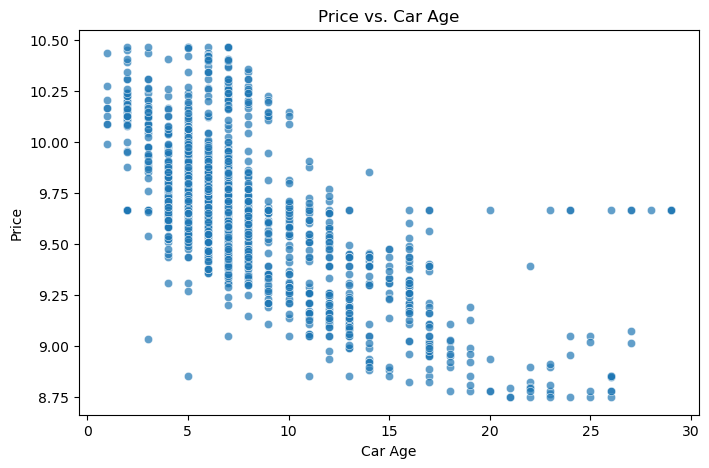

In [31]:
df_cleaned = df_cleaned.copy()
df_cleaned["car_age"] = 2024 - df_cleaned["year"]

plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["car_age"], y=df_cleaned["log_price"], alpha=0.7)
plt.title("Price vs. Car Age")
plt.xlabel("Car Age")
plt.ylabel("Price")
plt.show()


In [32]:
older_car = df_cleaned[df_cleaned['car_age'] > 10][['model', 'car_age', 'log_price']]
newer_car = df_cleaned[df_cleaned['car_age'] <= 10][['model', 'car_age', 'log_price']]

print("Older Cars (More than 10 years old):")
print(older_car)

print("\nNewer Cars (10 years or less):")
print(newer_car)



Older Cars (More than 10 years old):
              model  car_age  log_price
3     mercedes-benz       22   9.392745
12    mercedes-benz       17   8.962007
20    mercedes-benz       13   9.449436
24              kia       14   8.936035
28          hyundai       12   9.259226
...             ...      ...        ...
1610        hyundai       13   9.392745
1618  mercedes-benz       15   9.392745
1622  mercedes-benz       26   8.853808
1623  mercedes-benz       15   9.367430
1628  mercedes-benz       16   9.375940

[304 rows x 3 columns]

Newer Cars (10 years or less):
              model  car_age  log_price
0            toyota        2  10.106469
1     mercedes-benz       10  10.146473
2               kia        6   9.367430
4     mercedes-benz        7  10.165890
6            nissan        5  10.051951
...             ...      ...        ...
1637        hyundai        7   9.425532
1638         toyota       10   9.711176
1639         nissan        6   9.878221
1640         nissan        

In [33]:
df_cleaned

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500,10.106469,2
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500,10.146473,10
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700,9.367430,6
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000,9.392745,22
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000,10.165890,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400,9.425532,7
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500,9.711176,10
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500,9.878221,6
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500,9.878221,5


In [34]:
df_cleaned.dtypes

model            object
year              int64
motor_type       object
running          object
wheel            object
color            object
type             object
status           object
motor_volume    float64
price             int64
log_price       float64
car_age           int64
dtype: object

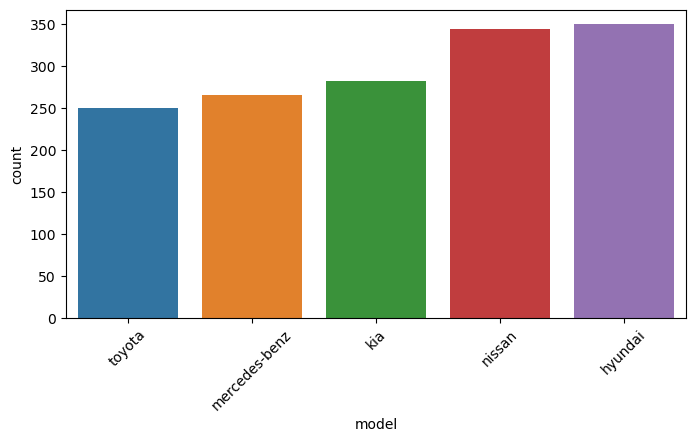

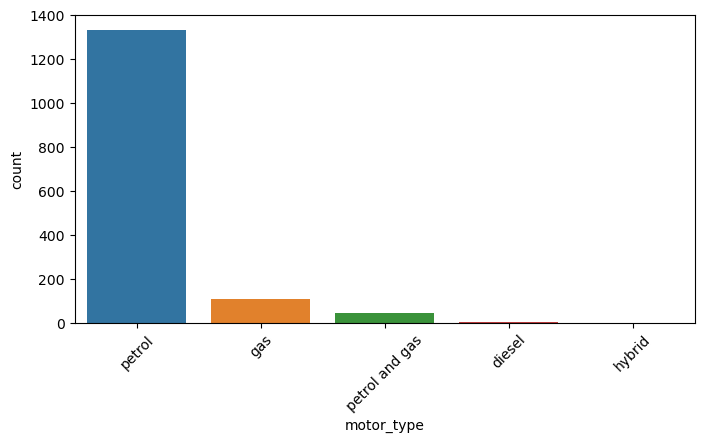

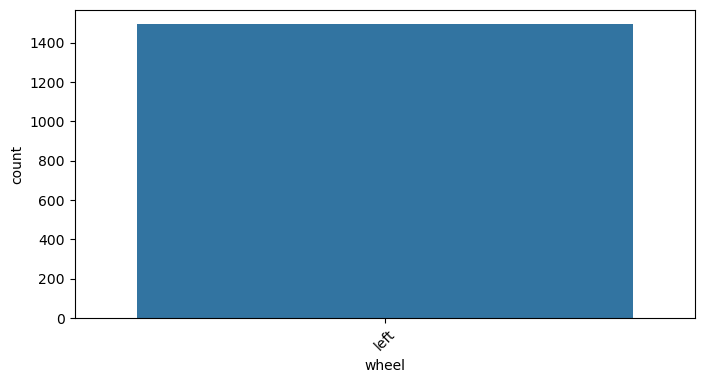

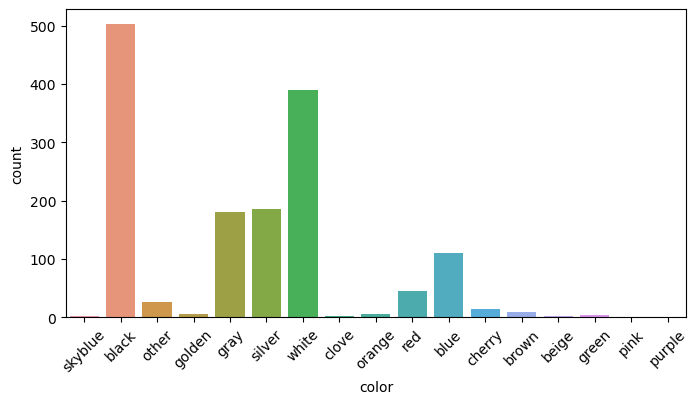

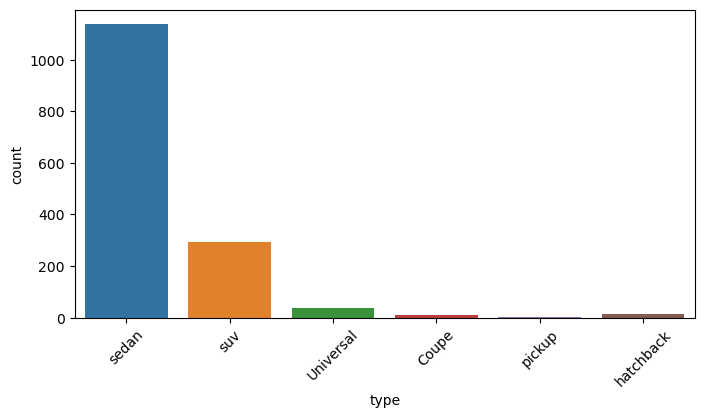

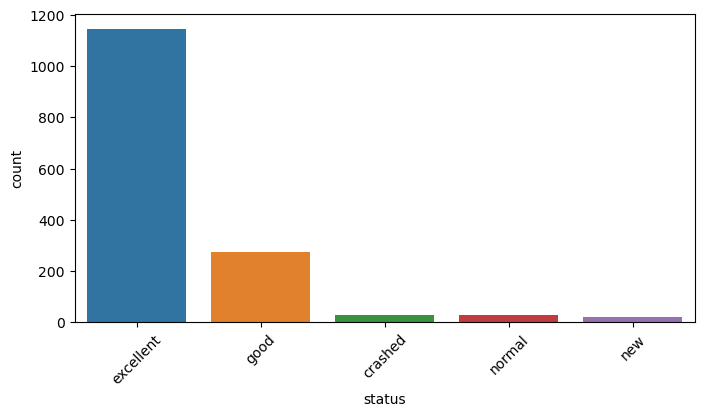

In [35]:
for col in ["model", "motor_type", "wheel", "color", "type", "status"]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df_cleaned[col])
    plt.xticks(rotation=45)
    plt.show()


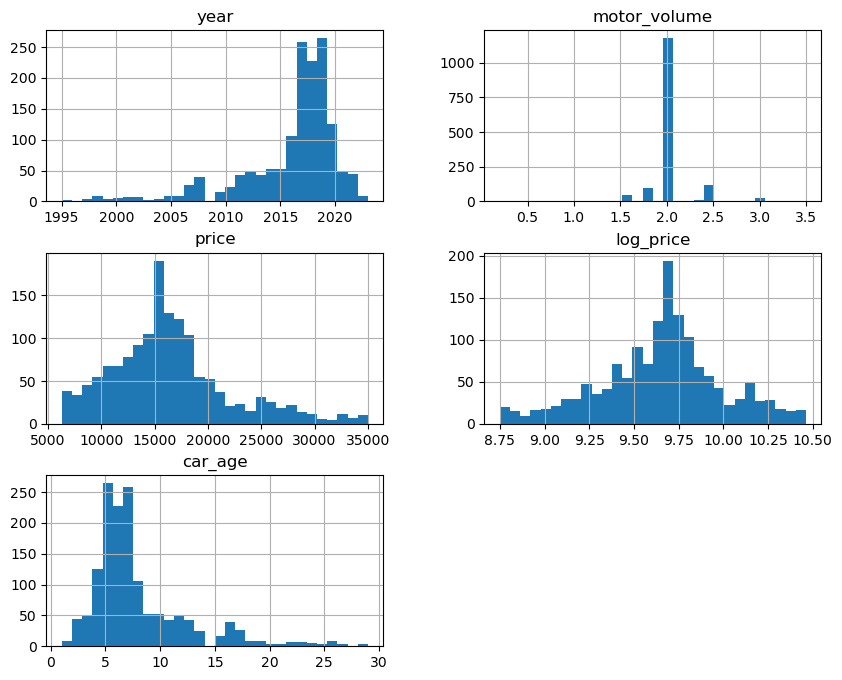

In [36]:
df_cleaned.hist(figsize=(10, 8), bins=30)
plt.show()


In [37]:
df_cleaned

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500,10.106469,2
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500,10.146473,10
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700,9.367430,6
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000,9.392745,22
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000,10.165890,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400,9.425532,7
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500,9.711176,10
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500,9.878221,6
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500,9.878221,5


In [38]:
df_cleaned["running"] = df_cleaned["running"].replace({" km": "", " miles": ""}, regex=True).astype(float)
df_cleaned["running"] = df_cleaned.apply(lambda x: x["running"] * 1.60934 if "miles" in str(x["running"]) else x["running"], axis=1)

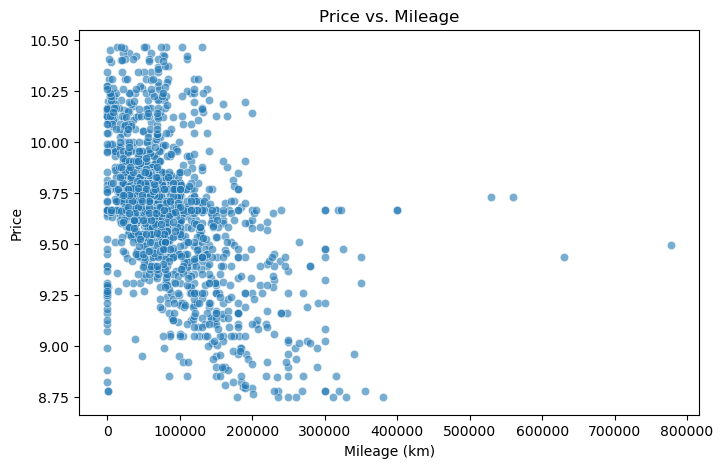

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["running"], y=df_cleaned["log_price"], alpha=0.6)
plt.title("Price vs. Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.show()


In [40]:
df_cleaned['running']

0         3000.0
1       132000.0
2        95000.0
3       137000.0
4       130000.0
          ...   
1637    120000.0
1638    170000.0
1639     68900.0
1640     31000.0
1641        20.0
Name: running, Length: 1492, dtype: float64

In [41]:
df_cleaned['running'].describe()

count      1492.000000
mean      86612.618633
std       71078.534134
min          10.000000
25%       40000.000000
50%       70000.000000
75%      115000.000000
max      777777.000000
Name: running, dtype: float64

Text(0.5, 1.0, 'Distribution of Running (Mileage)')

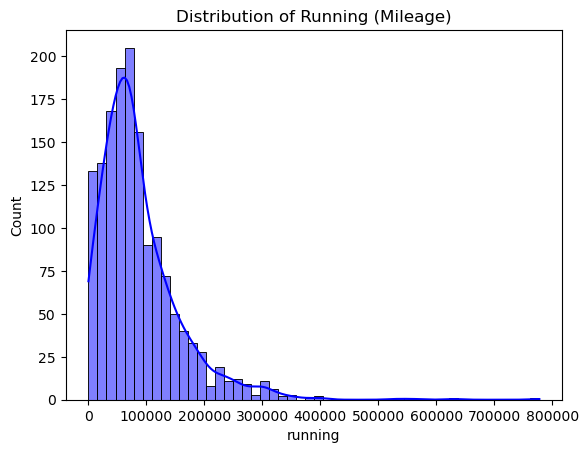

In [42]:
sns.histplot(df_cleaned["running"], bins=50, kde=True, color="blue")
plt.title("Distribution of Running (Mileage)")


In [43]:
# Compute IQR
Q1 = df_cleaned["running"].quantile(0.25)
Q3 = df_cleaned["running"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_cleaned[(df_cleaned["running"] < lower_bound) | (df_cleaned["running"] > upper_bound)]
print(f"Outliers detected: {len(outliers)}")

# Remove outliers
df_cleaned = df_cleaned[(df_cleaned["running"] >= lower_bound) & (df_cleaned["running"] <= upper_bound)]

# Final shape
print(f"Remaining data points after outlier removal: {df_cleaned.shape[0]}")


Outliers detected: 72
Remaining data points after outlier removal: 1420


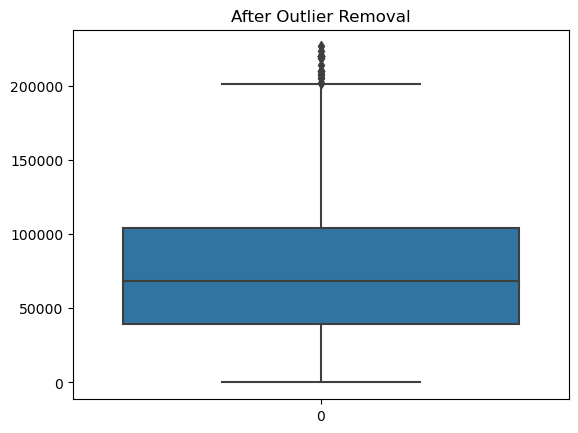

In [44]:
sns.boxplot(df_cleaned["running"])
plt.title("After Outlier Removal")
plt.show()


Text(0.5, 1.0, 'Distribution of Running (Mileage)')

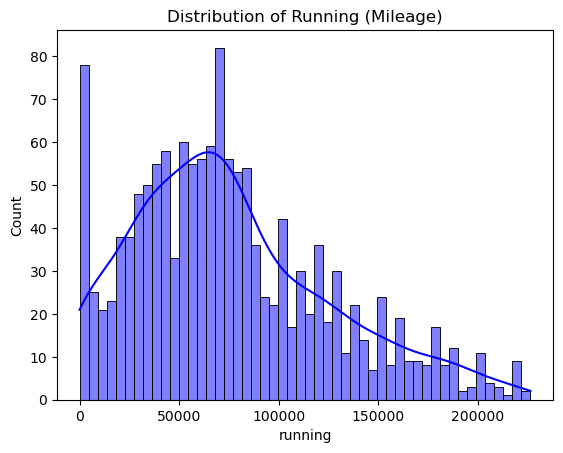

In [45]:
sns.histplot(df_cleaned["running"], bins=50, kde=True, color="blue")
plt.title("Distribution of Running (Mileage)")


In [46]:
df_cleaned['running'].describe()

count      1420.000000
mean      75878.671127
std       49905.337543
min          10.000000
25%       39182.250000
50%       68400.000000
75%      104000.000000
max      226566.000000
Name: running, dtype: float64

In [47]:
df_cleaned[df_cleaned["running"] == 10]


,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age
86,mercedes-benz,2012,petrol,10.0,left,white,sedan,excellent,2.5,10300,9.239996,12
238,mercedes-benz,2010,petrol,10.0,left,black,sedan,excellent,2.0,12000,9.392745,14
753,hyundai,2012,petrol,10.0,left,black,sedan,excellent,1.8,10400,9.249657,12
1254,kia,2012,petrol,10.0,left,red,Coupe,good,2.0,9200,9.127067,12


In [48]:
df_cleaned = df_cleaned[df_cleaned["running"] > 100]  

In [49]:
df_cleaned['running'].describe()

count      1390.000000
mean      77515.248921
std       49167.731957
min         101.000000
25%       41075.000000
50%       70000.000000
75%      105000.000000
max      226566.000000
Name: running, dtype: float64

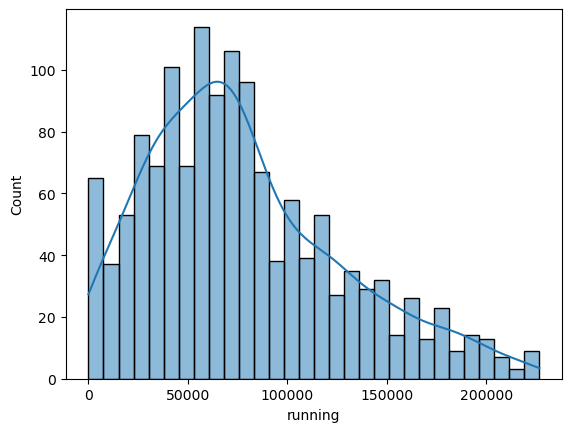

In [50]:
sns.histplot(df_cleaned["running"], bins=30, kde=True)
plt.show()

In [51]:
df_cleaned[["running", "price"]].corr()


,running,price
running,1.000000,-0.410646
price,-0.410646,1.000000


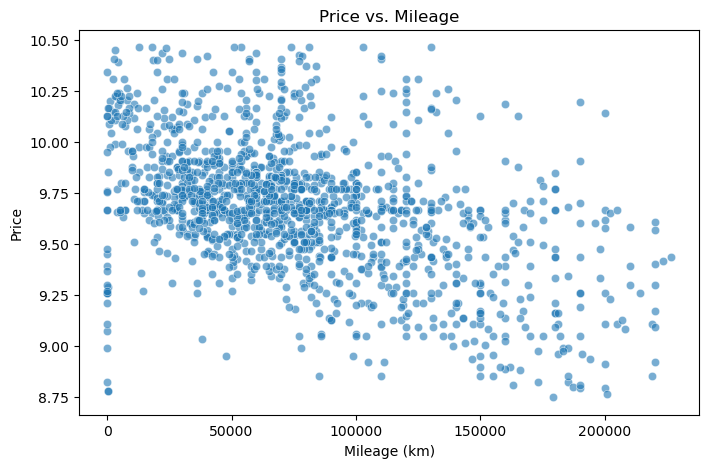

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned["running"], y=df_cleaned["log_price"], alpha=0.6)
plt.title("Price vs. Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.show()


In [53]:
df_cleaned['motor_type'].unique()

array(['petrol', 'gas', 'petrol and gas', 'diesel', 'hybrid'],
      dtype=object)

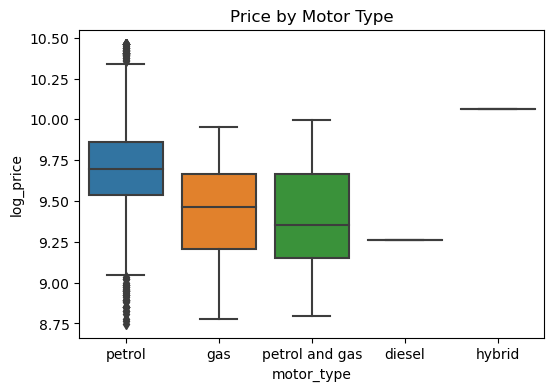

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_cleaned["motor_type"], y=df_cleaned["log_price"])
plt.title("Price by Motor Type")
plt.show()

In [55]:
df_cleaned['motor_type']

0       petrol
1       petrol
2       petrol
3       petrol
4       petrol
         ...  
1636    petrol
1637    petrol
1638    petrol
1639    petrol
1640    petrol
Name: motor_type, Length: 1390, dtype: object

In [56]:
df_cleaned

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age
0,toyota,2022,petrol,3000.0,left,skyblue,sedan,excellent,2.0,24500,10.106469,2
1,mercedes-benz,2014,petrol,132000.0,left,black,sedan,excellent,2.0,25500,10.146473,10
2,kia,2018,petrol,95000.0,left,other,sedan,excellent,2.0,11700,9.367430,6
3,mercedes-benz,2002,petrol,137000.0,left,golden,sedan,excellent,3.2,12000,9.392745,22
4,mercedes-benz,2017,petrol,130000.0,left,black,sedan,good,2.0,26000,10.165890,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,mercedes-benz,2018,petrol,69000.0,left,black,sedan,excellent,2.0,25400,10.142544,6
1637,hyundai,2017,petrol,120000.0,left,white,sedan,good,2.0,12400,9.425532,7
1638,toyota,2014,petrol,170000.0,left,black,sedan,good,2.0,16500,9.711176,10
1639,nissan,2018,petrol,68900.0,left,blue,suv,good,2.0,19500,9.878221,6


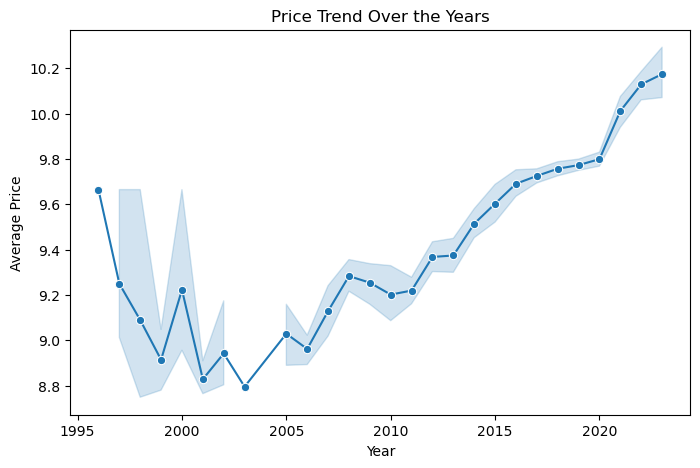

In [57]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df_cleaned["year"], y=df_cleaned["log_price"], marker="o")
plt.title("Price Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()


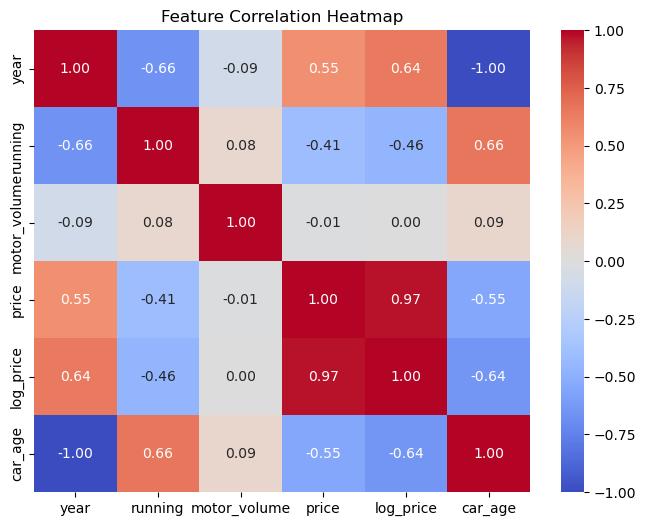

In [58]:
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [59]:
df_cleaned['log_price']

0       10.106469
1       10.146473
2        9.367430
3        9.392745
4       10.165890
          ...    
1636    10.142544
1637     9.425532
1638     9.711176
1639     9.878221
1640     9.878221
Name: log_price, Length: 1390, dtype: float64

In [60]:
df_cleaned["log_price_category"] = pd.qcut(df_cleaned["log_price"], q=3, labels=["Low", "Medium", "High"])


In [61]:
df_cleaned

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age,log_price_category
0,toyota,2022,petrol,3000.0,left,skyblue,sedan,excellent,2.0,24500,10.106469,2,High
1,mercedes-benz,2014,petrol,132000.0,left,black,sedan,excellent,2.0,25500,10.146473,10,High
2,kia,2018,petrol,95000.0,left,other,sedan,excellent,2.0,11700,9.367430,6,Low
3,mercedes-benz,2002,petrol,137000.0,left,golden,sedan,excellent,3.2,12000,9.392745,22,Low
4,mercedes-benz,2017,petrol,130000.0,left,black,sedan,good,2.0,26000,10.165890,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,mercedes-benz,2018,petrol,69000.0,left,black,sedan,excellent,2.0,25400,10.142544,6,High
1637,hyundai,2017,petrol,120000.0,left,white,sedan,good,2.0,12400,9.425532,7,Low
1638,toyota,2014,petrol,170000.0,left,black,sedan,good,2.0,16500,9.711176,10,Medium
1639,nissan,2018,petrol,68900.0,left,blue,suv,good,2.0,19500,9.878221,6,High


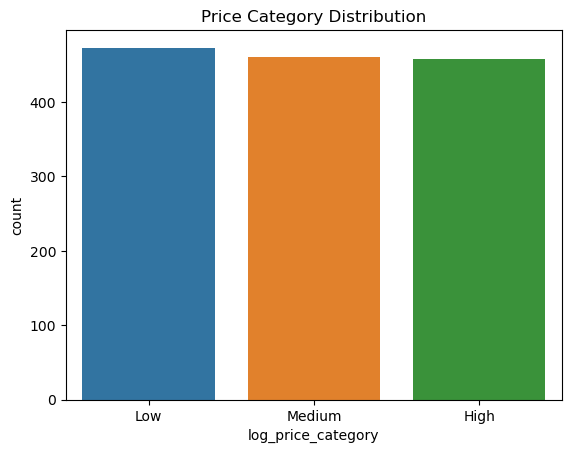

In [62]:
sns.countplot(x=df_cleaned["log_price_category"])
plt.title("Price Category Distribution")
plt.show()

In [63]:
df_cleaned['color'].nunique()

17

In [64]:
df_cleaned.columns

Index(['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'type',
       'status', 'motor_volume', 'price', 'log_price', 'car_age',
       'log_price_category'],
      dtype='object')

In [65]:
print(df_cleaned["log_price_category"].value_counts())


log_price_category
Low       473
Medium    460
High      457
Name: count, dtype: int64


In [66]:
df_cleaned.isnull().sum()

model                 0
year                  0
motor_type            0
running               0
wheel                 0
color                 0
type                  0
status                0
motor_volume          0
price                 0
log_price             0
car_age               0
log_price_category    0
dtype: int64

In [67]:
df_cleaned.duplicated().sum()

11

In [68]:
df_cleaned.drop_duplicates(inplace=True)

In [69]:
df_cleaned

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age,log_price_category
0,toyota,2022,petrol,3000.0,left,skyblue,sedan,excellent,2.0,24500,10.106469,2,High
1,mercedes-benz,2014,petrol,132000.0,left,black,sedan,excellent,2.0,25500,10.146473,10,High
2,kia,2018,petrol,95000.0,left,other,sedan,excellent,2.0,11700,9.367430,6,Low
3,mercedes-benz,2002,petrol,137000.0,left,golden,sedan,excellent,3.2,12000,9.392745,22,Low
4,mercedes-benz,2017,petrol,130000.0,left,black,sedan,good,2.0,26000,10.165890,7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,mercedes-benz,2018,petrol,69000.0,left,black,sedan,excellent,2.0,25400,10.142544,6,High
1637,hyundai,2017,petrol,120000.0,left,white,sedan,good,2.0,12400,9.425532,7,Low
1638,toyota,2014,petrol,170000.0,left,black,sedan,good,2.0,16500,9.711176,10,Medium
1639,nissan,2018,petrol,68900.0,left,blue,suv,good,2.0,19500,9.878221,6,High


In [70]:
df_cleaned.groupby(["model", "year", "running"]).agg({
    "price": ["mean", "median", "min", "max"],  
    "motor_volume": ["mean", "max"],  
    "log_price": ["mean"]
}).reset_index()


model  year   running    price                        motor_volume  \
                                  mean   median    min    max         mean   
0     hyundai  2007   98700.0   7700.0   7700.0   7700   7700          2.0   
1     hyundai  2007  160000.0   7250.0   7250.0   7250   7250          2.0   
2     hyundai  2010  105000.0   7500.0   7500.0   7500   7500          2.0   
3     hyundai  2011   73000.0   9800.0   9800.0   9800   9800          2.0   
4     hyundai  2011   75500.0   9700.0   9700.0   9700   9700          1.8   
...       ...   ...       ...      ...      ...    ...    ...          ...   
1125   toyota  2022   10000.0  19500.0  19500.0  19500  19500          2.0   
1126   toyota  2022   16000.0  15750.0  15750.0  15750  15750          2.0   
1127   toyota  2022   20000.0  31000.0  31000.0  31000  31000          2.0   
1128   toyota  2022   24000.0  30000.0  30000.0  30000  30000          2.0   
1129   toyota  2022   30000.0  28000.0  28000.0  28000  28000          1.6   

           log_price  
      max       mean  
0     2.0   8.949105  
1     2.0   8.888895  
2     2.0   8.922792  
3     2.0   9.190240  
4     1.8   9.179984  
...   ...        ...  
1125  2.0   9.878221  
1126  2.0   9.664659  
1127  2.0  10.341775  
1128  2.0  10.308986  
1129  1.6  10.239996  

[1130 rows x 10 columns]

In [71]:
df_cleaned.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,log_price,car_age,log_price_category
0,toyota,2022,petrol,3000.0,left,skyblue,sedan,excellent,2.0,24500,10.106469,2,High
1,mercedes-benz,2014,petrol,132000.0,left,black,sedan,excellent,2.0,25500,10.146473,10,High
2,kia,2018,petrol,95000.0,left,other,sedan,excellent,2.0,11700,9.367430,6,Low
3,mercedes-benz,2002,petrol,137000.0,left,golden,sedan,excellent,3.2,12000,9.392745,22,Low
4,mercedes-benz,2017,petrol,130000.0,left,black,sedan,good,2.0,26000,10.165890,7,High


In [72]:
print(df_cleaned['model'].nunique())
print(df_cleaned['color'].nunique())
print(df_cleaned['motor_type'].nunique())
print(df_cleaned['type'].nunique())
print(df_cleaned['status'].nunique())
print(df_cleaned['log_price_category'].nunique())
print(df_cleaned['wheel'].nunique())

5
17
5
5
5
3
1


In [73]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for low-cardinality categorical variables
label_cols = ['model', 'motor_type', 'type', 'status', 'log_price_category']
for col in label_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# Frequency Encoding for color to reduce columns
color_counts = df_cleaned['color'].value_counts().to_dict()
df_cleaned['color'] = df_cleaned['color'].map(color_counts)

# Drop wheel column as it has only 1 unique value
df_cleaned = df_cleaned.drop(columns=['wheel'])

print(df_cleaned.head())


   model  year  motor_type   running  color  type  status  motor_volume  \
0      4  2022           3    3000.0      2     3       1           2.0   
1      2  2014           3  132000.0    461     3       1           2.0   
2      1  2018           3   95000.0     26     3       1           2.0   
3      2  2002           3  137000.0      3     3       1           3.2   
4      2  2017           3  130000.0    461     3       2           2.0   

   price  log_price  car_age  log_price_category  
0  24500  10.106469        2                   0  
1  25500  10.146473       10                   0  
2  11700   9.367430        6                   1  
3  12000   9.392745       22                   1  
4  26000  10.165890        7                   0  


In [74]:
df_cleaned

,model,year,motor_type,running,color,type,status,motor_volume,price,log_price,car_age,log_price_category
0,4,2022,3,3000.0,2,3,1,2.0,24500,10.106469,2,0
1,2,2014,3,132000.0,461,3,1,2.0,25500,10.146473,10,0
2,1,2018,3,95000.0,26,3,1,2.0,11700,9.367430,6,1
3,2,2002,3,137000.0,3,3,1,3.2,12000,9.392745,22,1
4,2,2017,3,130000.0,461,3,2,2.0,26000,10.165890,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2,2018,3,69000.0,461,3,1,2.0,25400,10.142544,6,0
1637,0,2017,3,120000.0,369,3,2,2.0,12400,9.425532,7,1
1638,4,2014,3,170000.0,461,3,2,2.0,16500,9.711176,10,2
1639,3,2018,3,68900.0,105,4,2,2.0,19500,9.878221,6,0


In [75]:
df_cleaned["running_category"] = pd.cut(df_cleaned["running"], bins=3, labels=["Low", "Medium", "High"])


In [76]:
df_cleaned

,model,year,motor_type,running,color,type,status,motor_volume,price,log_price,car_age,log_price_category,running_category
0,4,2022,3,3000.0,2,3,1,2.0,24500,10.106469,2,0,Low
1,2,2014,3,132000.0,461,3,1,2.0,25500,10.146473,10,0,Medium
2,1,2018,3,95000.0,26,3,1,2.0,11700,9.367430,6,1,Medium
3,2,2002,3,137000.0,3,3,1,3.2,12000,9.392745,22,1,Medium
4,2,2017,3,130000.0,461,3,2,2.0,26000,10.165890,7,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2,2018,3,69000.0,461,3,1,2.0,25400,10.142544,6,0,Low
1637,0,2017,3,120000.0,369,3,2,2.0,12400,9.425532,7,1,Medium
1638,4,2014,3,170000.0,461,3,2,2.0,16500,9.711176,10,2,High
1639,3,2018,3,68900.0,105,4,2,2.0,19500,9.878221,6,0,Low


In [77]:
df_cleaned["power_per_liter"] = df_cleaned["motor_volume"] / df_cleaned["car_age"]


In [78]:
df_cleaned

,model,year,motor_type,running,color,type,status,motor_volume,price,log_price,car_age,log_price_category,running_category,power_per_liter
0,4,2022,3,3000.0,2,3,1,2.0,24500,10.106469,2,0,Low,1.000000
1,2,2014,3,132000.0,461,3,1,2.0,25500,10.146473,10,0,Medium,0.200000
2,1,2018,3,95000.0,26,3,1,2.0,11700,9.367430,6,1,Medium,0.333333
3,2,2002,3,137000.0,3,3,1,3.2,12000,9.392745,22,1,Medium,0.145455
4,2,2017,3,130000.0,461,3,2,2.0,26000,10.165890,7,0,Medium,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2,2018,3,69000.0,461,3,1,2.0,25400,10.142544,6,0,Low,0.333333
1637,0,2017,3,120000.0,369,3,2,2.0,12400,9.425532,7,1,Medium,0.285714
1638,4,2014,3,170000.0,461,3,2,2.0,16500,9.711176,10,2,High,0.200000
1639,3,2018,3,68900.0,105,4,2,2.0,19500,9.878221,6,0,Low,0.333333


In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  
num_cols = ["running", "motor_volume", "price", "car_age"]  

df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])


In [80]:
df_cleaned

,model,year,motor_type,running,color,type,status,motor_volume,price,log_price,car_age,log_price_category,running_category,power_per_liter
0,4,2022,3,-1.513990,2,3,1,-0.131423,1.400613,10.106469,-1.380179,0,Low,1.000000
1,2,2014,3,1.104448,461,3,1,-0.131423,1.581764,10.146473,0.651327,0,Medium,0.200000
2,1,2018,3,0.353423,26,3,1,-0.131423,-0.918113,9.367430,-0.364426,1,Medium,0.333333
3,2,2002,3,1.205938,3,3,1,5.046661,-0.863768,9.392745,3.698586,1,Medium,0.145455
4,2,2017,3,1.063852,461,3,2,-0.131423,1.672339,10.165890,-0.110488,0,Medium,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,2,2018,3,-0.174324,461,3,1,-0.131423,1.563649,10.142544,-0.364426,0,Low,0.333333
1637,0,2017,3,0.860873,369,3,2,-0.131423,-0.791308,9.425532,-0.110488,1,Medium,0.285714
1638,4,2014,3,1.875771,461,3,2,-0.131423,-0.048591,9.711176,0.651327,2,High,0.200000
1639,3,2018,3,-0.176354,105,4,2,-0.131423,0.494861,9.878221,-0.364426,0,Low,0.333333


In [81]:
df_cleaned.head()

,model,year,motor_type,running,color,type,status,motor_volume,price,log_price,car_age,log_price_category,running_category,power_per_liter
0,4,2022,3,-1.513990,2,3,1,-0.131423,1.400613,10.106469,-1.380179,0,Low,1.000000
1,2,2014,3,1.104448,461,3,1,-0.131423,1.581764,10.146473,0.651327,0,Medium,0.200000
2,1,2018,3,0.353423,26,3,1,-0.131423,-0.918113,9.367430,-0.364426,1,Medium,0.333333
3,2,2002,3,1.205938,3,3,1,5.046661,-0.863768,9.392745,3.698586,1,Medium,0.145455
4,2,2017,3,1.063852,461,3,2,-0.131423,1.672339,10.165890,-0.110488,0,Medium,0.285714


In [82]:
df_cleaned.drop(columns=['price','running_category', 'log_price_category'], inplace=True)

In [83]:
df_cleaned

,model,year,motor_type,running,color,type,status,motor_volume,log_price,car_age,power_per_liter
0,4,2022,3,-1.513990,2,3,1,-0.131423,10.106469,-1.380179,1.000000
1,2,2014,3,1.104448,461,3,1,-0.131423,10.146473,0.651327,0.200000
2,1,2018,3,0.353423,26,3,1,-0.131423,9.367430,-0.364426,0.333333
3,2,2002,3,1.205938,3,3,1,5.046661,9.392745,3.698586,0.145455
4,2,2017,3,1.063852,461,3,2,-0.131423,10.165890,-0.110488,0.285714
...,...,...,...,...,...,...,...,...,...,...,...
1636,2,2018,3,-0.174324,461,3,1,-0.131423,10.142544,-0.364426,0.333333
1637,0,2017,3,0.860873,369,3,2,-0.131423,9.425532,-0.110488,0.285714
1638,4,2014,3,1.875771,461,3,2,-0.131423,9.711176,0.651327,0.200000
1639,3,2018,3,-0.176354,105,4,2,-0.131423,9.878221,-0.364426,0.333333


# CREATING OUR MODEL

In creating the model I will use Linear Regression and Random Forest Regressor algorithms since it is a regression problem to compare which model will perform better, the one that performs better what I will use to make my predictions and also fine tune further

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df_cleaned.drop(columns=['log_price'])  
y = df_cleaned['log_price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train

,model,year,motor_type,running,color,type,status,motor_volume,car_age,power_per_liter
1332,4,2007,1,2.890670,461,3,1,-1.857452,2.428894,0.094118
370,0,2018,3,-0.397602,168,3,1,-1.857452,-0.364426,0.266667
1107,3,2018,3,-0.204771,461,4,1,2.026112,-0.364426,0.416667
825,1,2019,1,-0.762965,168,3,1,-0.131423,-0.618364,0.400000
1482,1,2019,3,-0.478794,105,3,1,-0.131423,-0.618364,0.400000
...,...,...,...,...,...,...,...,...,...,...
1320,3,2019,3,-0.156056,369,4,1,2.026112,-0.618364,0.500000
1361,3,2017,3,0.373721,168,4,1,-0.131423,-0.110488,0.285714
1548,0,2013,1,0.251933,168,3,1,-0.131423,0.905265,0.181818
1040,3,2019,3,-1.128329,369,4,1,-0.131423,-0.618364,0.400000


In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [90]:
predictions = model.predict(X_test)

In [91]:
predictions

array([ 9.71874322,  9.71716394,  9.72797991,  9.70575395,  9.90477177,
        9.92239613,  9.74141276, 10.15038883,  9.88776625,  9.71885296,
        9.79133172,  9.61938404,  9.78474505,  9.84258871,  9.50772304,
        9.79207914,  9.8756179 ,  9.77452743,  9.58625817,  9.46137746,
        9.67593645,  9.63965444,  9.80627094,  9.76742552,  9.62269668,
        9.85566704,  9.72369651,  9.83421673,  9.81382664,  9.75370834,
        8.98820526,  9.79866179,  9.43479604,  9.69080572,  9.68674189,
        9.67561825,  9.2601389 ,  9.8348964 ,  9.76248252,  9.91491906,
        9.74749451,  9.80478995,  9.83569577,  9.77591795,  9.56171749,
        9.43351128,  9.66314376,  9.31633295,  9.30399271,  9.59702633,
        9.38910625,  9.73966524,  9.79255228,  9.63013906,  9.77581483,
        9.76489599,  9.80813369,  9.7012586 ,  9.92828386,  9.80036933,
        9.89057064,  9.85989979, 10.00079214,  9.73747429,  9.30732755,
        9.78132412,  9.91084104,  9.81900867,  9.47546725,  9.91

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("R² Score:", r2_score(y_test, predictions))

Linear Regression Performance:
MAE: 0.17267572720626437
RMSE: 0.24667905782887548
R² Score: 0.42824071324650204


In [93]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.12436951818877957
RMSE: 0.18132484964225856
R² Score: 0.6910677002916074


# MODEL TUNING

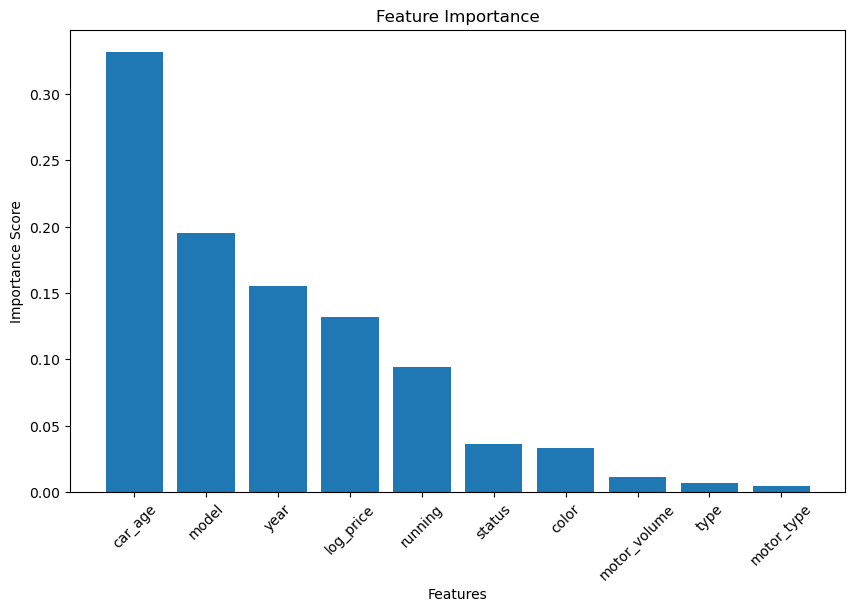

In [94]:
importances = rf_model.feature_importances_
feature_names = df_cleaned.columns

# Sorting feature importance in descending order and creating the plot
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [96]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)


In [97]:
# Model evaluation
print("xgboost Performance:")
print("MAE:", mean_absolute_error(y_test, xgb_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("R² Score:", r2_score(y_test, xgb_preds))


xgboost Performance:
MAE: 0.11935753307505924
RMSE: 0.17629685593726718
R² Score: 0.7079630529275677


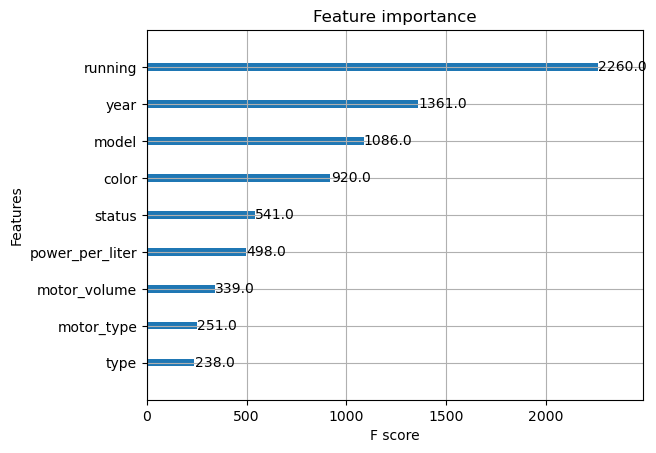

In [98]:
import xgboost as xgb

xgb.plot_importance(xgb_model)
plt.show()


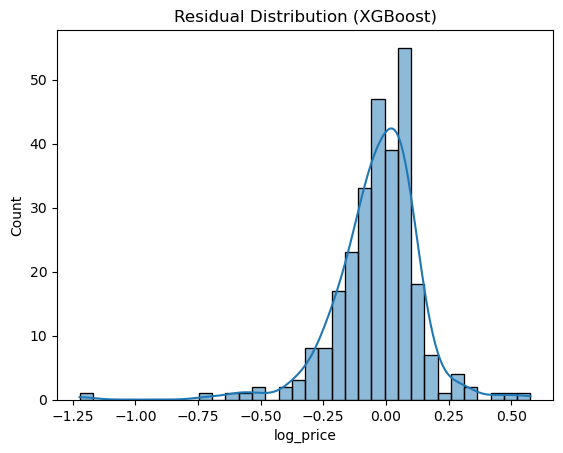

In [99]:
residuals = y_test - xgb_preds
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (XGBoost)")
plt.show()


In [100]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


In [101]:
y_pred = best_xgb.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 0.11762215101441086
RMSE: 0.17004521646855775
R² Score: 0.7283075913487289


# CHECKING THE PERFORMANCE ON THE TEST DATASET

So we will upload the test dataset clean it that is do encoding on the categorical columns, perform summary statistics,check null values and duplicates, do feature creation and then pass it to our model for predictions

In [102]:
test_data = pd.read_csv('test.csv')

In [103]:
test_data

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8
...,...,...,...,...,...,...,...,...,...,...
406,406,nissan,2021,petrol,33400 km,left,black,suv,excellent,2.0
407,407,hyundai,2017,petrol,60000 miles,left,other,sedan,excellent,2.0
408,408,mercedes-benz,2012,petrol,218000 km,left,white,sedan,good,2.0
409,409,kia,2020,petrol,40000 miles,left,red,sedan,good,2.0


In [104]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            411 non-null    int64  
 1   model         411 non-null    object 
 2   year          411 non-null    int64  
 3   motor_type    411 non-null    object 
 4   running       411 non-null    object 
 5   wheel         411 non-null    object 
 6   color         411 non-null    object 
 7   type          411 non-null    object 
 8   status        411 non-null    object 
 9   motor_volume  411 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 32.2+ KB


In [105]:
test_data.describe()

,Id,year,motor_volume
count,411.00000,411.000000,411.000000
mean,205.00000,2014.963504,2.025061
std,118.78973,6.538899,0.228633
min,0.00000,1993.000000,1.500000
25%,102.50000,2014.000000,2.000000
50%,205.00000,2017.000000,2.000000
75%,307.50000,2019.000000,2.000000
max,410.00000,2023.000000,4.300000


In [106]:
test_data["running"] = test_data["running"].replace({" km": "", " miles": ""}, regex=True).astype(float)
test_data["running"] = test_data.apply(lambda x: x["running"] * 1.60934 if "miles" in str(x["running"]) else x["running"], axis=1)

In [107]:
test_data

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000.0,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000.0,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000.0,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000.0,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000.0,left,black,Universal,normal,1.8
...,...,...,...,...,...,...,...,...,...,...
406,406,nissan,2021,petrol,33400.0,left,black,suv,excellent,2.0
407,407,hyundai,2017,petrol,60000.0,left,other,sedan,excellent,2.0
408,408,mercedes-benz,2012,petrol,218000.0,left,white,sedan,good,2.0
409,409,kia,2020,petrol,40000.0,left,red,sedan,good,2.0


In [108]:
test_data.dtypes

Id                int64
model            object
year              int64
motor_type       object
running         float64
wheel            object
color            object
type             object
status           object
motor_volume    float64
dtype: object

In [109]:
test_data

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000.0,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000.0,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000.0,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000.0,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000.0,left,black,Universal,normal,1.8
...,...,...,...,...,...,...,...,...,...,...
406,406,nissan,2021,petrol,33400.0,left,black,suv,excellent,2.0
407,407,hyundai,2017,petrol,60000.0,left,other,sedan,excellent,2.0
408,408,mercedes-benz,2012,petrol,218000.0,left,white,sedan,good,2.0
409,409,kia,2020,petrol,40000.0,left,red,sedan,good,2.0


In [110]:
test_data = test_data.copy()
test_data["car_age"] = 2024 - test_data["year"]

In [111]:
test_data.head()

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume,car_age
0,0,kia,2020,petrol,24000.0,left,black,sedan,excellent,2.0,4
1,1,nissan,2017,petrol,85000.0,left,white,suv,excellent,2.0,7
2,2,hyundai,2021,petrol,30000.0,left,white,sedan,excellent,2.0,3
3,3,kia,2018,petrol,53000.0,left,silver,sedan,excellent,2.0,6
4,4,mercedes-benz,2003,petrol,230000.0,left,black,Universal,normal,1.8,21


In [112]:
print(test_data['model'].nunique())
print(test_data['color'].nunique())
print(test_data['motor_type'].nunique())
print(test_data['type'].nunique())
print(test_data['status'].nunique())
print(test_data['wheel'].nunique())

5
14
3
5
5
2


In [113]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for low-cardinality categorical variables
label_cols = ['model', 'motor_type', 'type', 'status']
for col in label_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

# Frequency Encoding for color to reduce columns
color_counts = test_data['color'].value_counts().to_dict()
test_data['color'] = test_data['color'].map(color_counts)

# Droping wheel column as it has only 1 unique value
test_data = test_data.drop(columns=['wheel'])

print(test_data.head())


   Id  model  year  motor_type   running  color  type  status  motor_volume  \
0   0      1  2020           1   24000.0    131     3       1           2.0   
1   1      3  2017           1   85000.0     96     4       1           2.0   
2   2      0  2021           1   30000.0     96     3       1           2.0   
3   3      1  2018           1   53000.0     61     3       1           2.0   
4   4      2  2003           1  230000.0    131     1       4           1.8   

   car_age  
0        4  
1        7  
2        3  
3        6  
4       21  


In [114]:
test_data

,Id,model,year,motor_type,running,color,type,status,motor_volume,car_age
0,0,1,2020,1,24000.0,131,3,1,2.0,4
1,1,3,2017,1,85000.0,96,4,1,2.0,7
2,2,0,2021,1,30000.0,96,3,1,2.0,3
3,3,1,2018,1,53000.0,61,3,1,2.0,6
4,4,2,2003,1,230000.0,131,1,4,1.8,21
...,...,...,...,...,...,...,...,...,...,...
406,406,3,2021,1,33400.0,131,4,1,2.0,3
407,407,0,2017,1,60000.0,7,3,1,2.0,7
408,408,2,2012,1,218000.0,96,3,2,2.0,12
409,409,1,2020,1,40000.0,11,3,2,2.0,4


In [115]:
test_data["power_per_liter"] = test_data["motor_volume"] / test_data["car_age"]


In [116]:
test_data

,Id,model,year,motor_type,running,color,type,status,motor_volume,car_age,power_per_liter
0,0,1,2020,1,24000.0,131,3,1,2.0,4,0.500000
1,1,3,2017,1,85000.0,96,4,1,2.0,7,0.285714
2,2,0,2021,1,30000.0,96,3,1,2.0,3,0.666667
3,3,1,2018,1,53000.0,61,3,1,2.0,6,0.333333
4,4,2,2003,1,230000.0,131,1,4,1.8,21,0.085714
...,...,...,...,...,...,...,...,...,...,...,...
406,406,3,2021,1,33400.0,131,4,1,2.0,3,0.666667
407,407,0,2017,1,60000.0,7,3,1,2.0,7,0.285714
408,408,2,2012,1,218000.0,96,3,2,2.0,12,0.166667
409,409,1,2020,1,40000.0,11,3,2,2.0,4,0.500000


In [117]:
test_data.isnull().sum()

Id                 0
model              0
year               0
motor_type         0
running            0
color              0
type               0
status             0
motor_volume       0
car_age            0
power_per_liter    0
dtype: int64

In [118]:
test_data.duplicated().sum()

0

In [119]:
scaler = StandardScaler()  
num_cols = ["running", "motor_volume", "car_age"]  

test_data[num_cols] = scaler.fit_transform(test_data[num_cols])


In [120]:
test_data

,Id,model,year,motor_type,running,color,type,status,motor_volume,car_age,power_per_liter
0,0,1,2020,1,-0.868106,131,3,1,-0.109745,-0.771175,0.500000
1,1,3,2017,1,-0.099669,96,4,1,-0.109745,-0.311823,0.285714
2,2,0,2021,1,-0.792522,96,3,1,-0.109745,-0.924292,0.666667
3,3,1,2018,1,-0.502783,61,3,1,-0.109745,-0.464940,0.333333
4,4,2,2003,1,1.726943,131,1,4,-0.985577,1.831820,0.085714
...,...,...,...,...,...,...,...,...,...,...,...
406,406,3,2021,1,-0.749691,131,4,1,-0.109745,-0.924292,0.666667
407,407,0,2017,1,-0.414602,7,3,1,-0.109745,-0.311823,0.285714
408,408,2,2012,1,1.575775,96,3,2,-0.109745,0.453764,0.166667
409,409,1,2020,1,-0.666549,11,3,2,-0.109745,-0.771175,0.500000


In [121]:
test_data.dtypes

Id                   int64
model                int32
year                 int64
motor_type           int32
running            float64
color                int64
type                 int32
status               int32
motor_volume       float64
car_age            float64
power_per_liter    float64
dtype: object

In [122]:
df_cleaned.dtypes


model                int32
year                 int64
motor_type           int32
running            float64
color                int64
type                 int32
status               int32
motor_volume       float64
log_price          float64
car_age            float64
power_per_liter    float64
dtype: object

In [123]:
X_test = test_data[X_train.columns]  
X_test

,model,year,motor_type,running,color,type,status,motor_volume,car_age,power_per_liter
0,1,2020,1,-0.868106,131,3,1,-0.109745,-0.771175,0.500000
1,3,2017,1,-0.099669,96,4,1,-0.109745,-0.311823,0.285714
2,0,2021,1,-0.792522,96,3,1,-0.109745,-0.924292,0.666667
3,1,2018,1,-0.502783,61,3,1,-0.109745,-0.464940,0.333333
4,2,2003,1,1.726943,131,1,4,-0.985577,1.831820,0.085714
...,...,...,...,...,...,...,...,...,...,...
406,3,2021,1,-0.749691,131,4,1,-0.109745,-0.924292,0.666667
407,0,2017,1,-0.414602,7,3,1,-0.109745,-0.311823,0.285714
408,2,2012,1,1.575775,96,3,2,-0.109745,0.453764,0.166667
409,1,2020,1,-0.666549,11,3,2,-0.109745,-0.771175,0.500000


In [124]:
y_test_preds = best_xgb.predict(X_test)

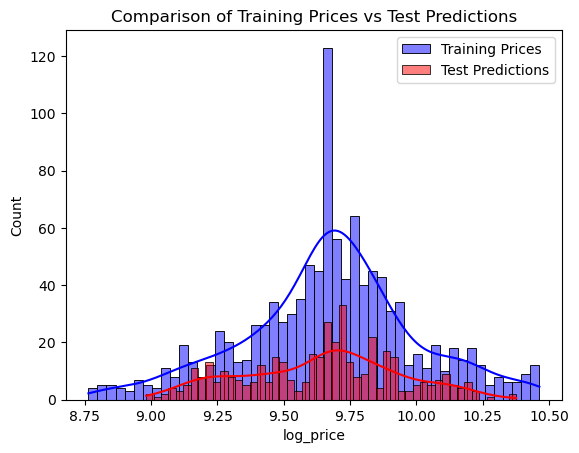

In [125]:
# Plotting the training target distribution
sns.histplot(y_train, bins=50, color='blue', label='Training Prices', kde=True)

# Plotting the test predictions distribution
sns.histplot(y_test_preds, bins=50, color='red', label='Test Predictions', kde=True)

plt.legend()
plt.title("Comparison of Training Prices vs Test Predictions")
plt.show()


In [126]:
print("Train Price Range:", y_train.min(), "to", y_train.max())
print("Test Predictions Range:", y_test_preds.min(), "to", y_test_preds.max())


Train Price Range: 8.764209507142004 to 10.463131911491967
Test Predictions Range: 8.981503 to 10.375783


In [127]:
sample_test = X_test.copy()
sample_test['Predicted Price'] = y_test_preds
print(sample_test.head(10))


   model  year  motor_type   running  color  type  status  motor_volume  \
0      1  2020           1 -0.868106    131     3       1     -0.109745   
1      3  2017           1 -0.099669     96     4       1     -0.109745   
2      0  2021           1 -0.792522     96     3       1     -0.109745   
3      1  2018           1 -0.502783     61     3       1     -0.109745   
4      2  2003           1  1.726943    131     1       4     -0.985577   
5      0  2021           1 -0.968884    131     3       1     -0.109745   
6      2  1998           1  1.676554     30     3       2     -0.985577   
7      2  2001           1  0.530197     61     0       2     -0.109745   
8      3  2017           1  0.905686     55     4       1      2.079835   
9      4  2019           1 -0.376810     55     3       1     -0.985577   

    car_age  power_per_liter  Predicted Price  
0 -0.771175         0.500000         9.724178  
1 -0.311823         0.285714         9.733133  
2 -0.924292         0.666667  

In [128]:
sample = pd.read_csv('sample_submission.csv')

In [129]:
sample

,Id,price
0,0,38
1,1,20549
2,2,3927
3,3,5572
4,4,28598
...,...,...
406,406,2514
407,407,20307
408,408,27274
409,409,14422


Let's create a submission file below for our predictions on the test dataset

In [130]:
y_test_preds_original = np.exp(y_test_preds)  

# A submission file
submission = pd.DataFrame({
    'Id': range(len(y_test_preds_original)),  
    'price': y_test_preds_original  
})

# Converting price to integers
submission['price'] = submission['price'].astype(int)

submission.to_csv('submission.csv', index=False)

print("Submission file saved as submission.csv")

Submission file saved as submission.csv


In [131]:
X_test.shape

(411, 10)

Saving Our Trained model

In [132]:
import joblib

joblib.dump(best_xgb, "xgboost_model.pkl")

print("Model saved as xgboost_model.pkl")


Model saved as xgboost_model.pkl


In [133]:
X_train

,model,year,motor_type,running,color,type,status,motor_volume,car_age,power_per_liter
1332,4,2007,1,2.890670,461,3,1,-1.857452,2.428894,0.094118
370,0,2018,3,-0.397602,168,3,1,-1.857452,-0.364426,0.266667
1107,3,2018,3,-0.204771,461,4,1,2.026112,-0.364426,0.416667
825,1,2019,1,-0.762965,168,3,1,-0.131423,-0.618364,0.400000
1482,1,2019,3,-0.478794,105,3,1,-0.131423,-0.618364,0.400000
...,...,...,...,...,...,...,...,...,...,...
1320,3,2019,3,-0.156056,369,4,1,2.026112,-0.618364,0.500000
1361,3,2017,3,0.373721,168,4,1,-0.131423,-0.110488,0.285714
1548,0,2013,1,0.251933,168,3,1,-0.131423,0.905265,0.181818
1040,3,2019,3,-1.128329,369,4,1,-0.131423,-0.618364,0.400000


# MODEL TUNING TO IMPROVE THE SCORE

Here I'm tuning the model again since I realized it wasnt performing thaat good, so lets try to fine tune again to improve the R score

In [137]:
import xgboost as xgb\

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# Define XGBoost parameters
xgb_params = {
    "n_estimators": 500,
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "eval_metric": "mae",
    "objective": "reg:squarederror"  
}

# Convert datasets into DMatrix format
train_dmatrix = xgb.DMatrix(X_train_final, label=y_train_final)
val_dmatrix = xgb.DMatrix(X_val, label=y_val)

# Train XGBoost model with early stopping
xgb_model = xgb.train(
    params=xgb_params,  
    dtrain=train_dmatrix,
    num_boost_round=500,
    evals=[(val_dmatrix, "validation")],
    early_stopping_rounds=50,
    verbose_eval=10
)

# Convert test data to DMatrix
test_dmatrix = xgb.DMatrix(X_test)

# Making predictions
y_pred_optimized = xgb_model.predict(test_dmatrix)

# Print first few predictions
print(y_pred_optimized[:5])


C:\Users\san\anaconda PY\Anaconda Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-mae:0.22885
[10]	validation-mae:0.19364
[20]	validation-mae:0.16686
[30]	validation-mae:0.14759
[40]	validation-mae:0.13466
[50]	validation-mae:0.12647
[60]	validation-mae:0.11991
[70]	validation-mae:0.11654
[80]	validation-mae:0.11408
[90]	validation-mae:0.11200
[100]	validation-mae:0.11140
[110]	validation-mae:0.11048
[120]	validation-mae:0.11003
[130]	validation-mae:0.10965
[140]	validation-mae:0.10952
[150]	validation-mae:0.10937
[160]	validation-mae:0.10931
[170]	validation-mae:0.10924
[180]	validation-mae:0.10949
[190]	validation-mae:0.10948
[200]	validation-mae:0.10966
[210]	validation-mae:0.10978
[216]	validation-mae:0.10976
[ 9.745948   9.725609  10.0268345  9.590747   9.395252 ]


In [138]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, xgb_model.predict(val_dmatrix))
print("R² Score:", r2)


R² Score: 0.7614010716351551


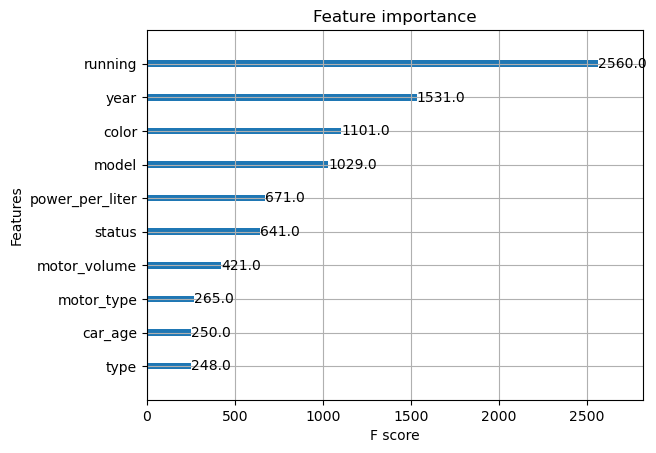

In [139]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [140]:
low_importance_features = ["car_age", "type"]

X_train_final = X_train_final.drop(columns=low_importance_features)
X_val = X_val.drop(columns=low_importance_features)
X_test = X_test.drop(columns=low_importance_features)


In [141]:
# Interaction: Power per Liter × Motor Volume
X_train_final["power_motor"] = X_train_final["power_per_liter"] * X_train_final["motor_volume"]
X_val["power_motor"] = X_val["power_per_liter"] * X_val["motor_volume"]
X_test["power_motor"] = X_test["power_per_liter"] * X_test["motor_volume"]

# Interaction: Running × Motor Volume
X_train_final["running_motor"] = X_train_final["running"] * X_train_final["motor_volume"]
X_val["running_motor"] = X_val["running"] * X_val["motor_volume"]
X_test["running_motor"] = X_test["running"] * X_test["motor_volume"]

# Interaction: Status × Motor Type
X_train_final["status_motor"] = X_train_final["status"] * X_train_final["motor_type"]
X_val["status_motor"] = X_val["status"] * X_val["motor_type"]
X_test["status_motor"] = X_test["status"] * X_test["motor_type"]


In [142]:
import xgboost as xgb

# Convert datasets into DMatrix format
train_dmatrix = xgb.DMatrix(X_train_final, label=y_train_final)
val_dmatrix = xgb.DMatrix(X_val, label=y_val)
test_dmatrix = xgb.DMatrix(X_test)

# Train model with early stopping
xgb_model = xgb.train(
    params={
        "objective": "reg:squarederror",
        "learning_rate": 0.03,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "eval_metric": "mae"
    },
    dtrain=train_dmatrix,
    num_boost_round=500,
    evals=[(val_dmatrix, "validation")],
    early_stopping_rounds=50,
    verbose_eval=10
)

y_pred_optimized = xgb_model.predict(test_dmatrix)


[0]	validation-mae:0.22728
[10]	validation-mae:0.18992
[20]	validation-mae:0.16543
[30]	validation-mae:0.14771
[40]	validation-mae:0.13453
[50]	validation-mae:0.12577
[60]	validation-mae:0.12125
[70]	validation-mae:0.11644
[80]	validation-mae:0.11319
[90]	validation-mae:0.11177
[100]	validation-mae:0.11051
[110]	validation-mae:0.10971
[120]	validation-mae:0.10907
[130]	validation-mae:0.10900
[140]	validation-mae:0.10878
[150]	validation-mae:0.10874
[160]	validation-mae:0.10865
[170]	validation-mae:0.10874
[180]	validation-mae:0.10877
[190]	validation-mae:0.10884
[200]	validation-mae:0.10876
[202]	validation-mae:0.10886


In [143]:
from sklearn.metrics import r2_score

# Predicting on validation set
y_val_pred = xgb_model.predict(val_dmatrix)

# Computing R² score
r2_val = r2_score(y_val, y_val_pred)
print(f"Validation R² Score: {r2_val:.4f}")


Validation R² Score: 0.7740


In [144]:
import joblib
joblib.dump(xgb_model, "car_price_model.pkl")


['car_price_model.pkl']